# WELCOME TO THE NOTEBOOK
---

Importing Modules

In [1]:
import pandas as pd 

Loading the data

In [2]:
pd

<module 'pandas' from '/opt/conda/lib/python3.10/site-packages/pandas/__init__.py'>

In [3]:
data= pd.read_json('movies_dataset.json')
data.head()

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1


Check the dataframe shape (#rows and #columns)

In [4]:
data.shape

(5043, 14)

Let's check the data types of the columns

In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration', 'gross',
       'genres', 'star_name', 'movie_title', 'movie_imdb_link', 'language',
       'country', 'budget', 'title_year', 'imdb_score'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   director_name           4939 non-null   object 
 2   num_critic_for_reviews  4993 non-null   float64
 3   duration                5028 non-null   float64
 4   gross                   4159 non-null   float64
 5   genres                  5043 non-null   object 
 6   star_name               5036 non-null   object 
 7   movie_title             5043 non-null   object 
 8   movie_imdb_link         5043 non-null   object 
 9   language                5031 non-null   object 
 10  country                 5038 non-null   object 
 11  budget                  4551 non-null   float64
 12  title_year              4935 non-null   float64
 13  imdb_score              5043 non-null   float64
dtypes: float64(6), object(8)
memory usage: 5

In [7]:
data.isnull().sum()

color                      19
director_name             104
num_critic_for_reviews     50
duration                   15
gross                     884
genres                      0
star_name                   7
movie_title                 0
movie_imdb_link             0
language                   12
country                     5
budget                    492
title_year                108
imdb_score                  0
dtype: int64

Column Selection

In [8]:
data['color']

0       Color
1       Color
2       Color
3       Color
4         NaN
        ...  
5038    Color
5039    Color
5040    Color
5041    Color
5042    Color
Name: color, Length: 5043, dtype: object

---

## Data Preparation
Remove some columns:    
   
   - `movie_imdb_link`
   - `num_critic_for_reviews`
   - `genre`

In [9]:
data.drop(axis=1, columns= ['movie_imdb_link','num_critic_for_reviews','genres'], inplace=True  )

In [10]:
data.dtypes

color             object
director_name     object
duration         float64
gross            float64
star_name         object
movie_title       object
language          object
country           object
budget           float64
title_year       float64
imdb_score       float64
dtype: object

Exercise: Remove the rest of the columns 


Let's check the shape again

In [11]:
data.shape

(5043, 11)

Let's convert the dtype of `title_year` column to integer

In [12]:
data1=data.title_year.astype('Int64')
data1.dtypes

Int64Dtype()

Let's check the dataframe again

In [13]:
data.head()

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,7.1


Renaming some columns: 
- changing `gross` to `movie_income`

In [14]:
rename_dict= {'gross': 'movie_income', 'language':'Language'}
data.rename(columns=rename_dict, inplace=True)
data.head()

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,7.1


Exercise: Rename the `budget` column to `movie_budget`

In [15]:
rena_dict={'budget':'movie_budget', 'country':'Country'}
data.rename(columns=rena_dict, inplace=True)
data.head(2)

,color,director_name,duration,movie_income,star_name,movie_title,Language,Country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1


---
### Data Analysis 


Let's checkout the distribution of `duration` column using a histogram.


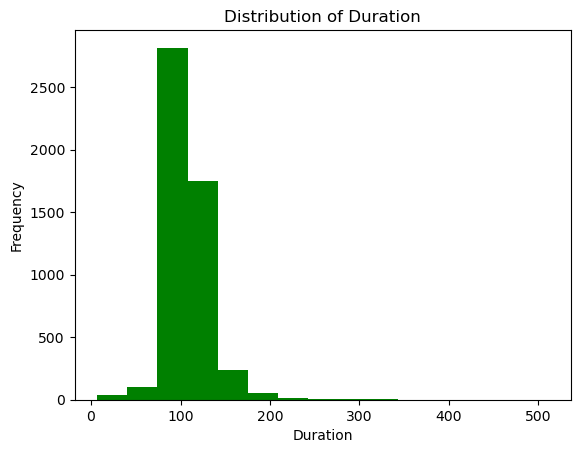

In [16]:
import matplotlib.pyplot as plt

# Create a histogram of the 'duration' column
plt.hist(data['duration'], bins=15, color='green')

# Add a title and labels
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

Text(0.5, 1.0, 'Duration QTY')

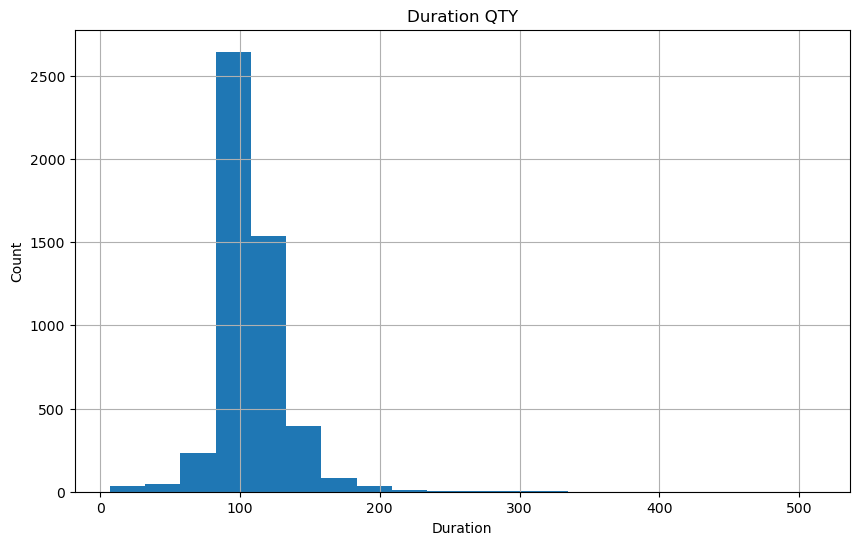

In [17]:
data.duration.hist(bins=20, figsize=(10,6))
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Duration QTY')

Exercise: Create a hitogram to see the distribution of `imdb_score` column

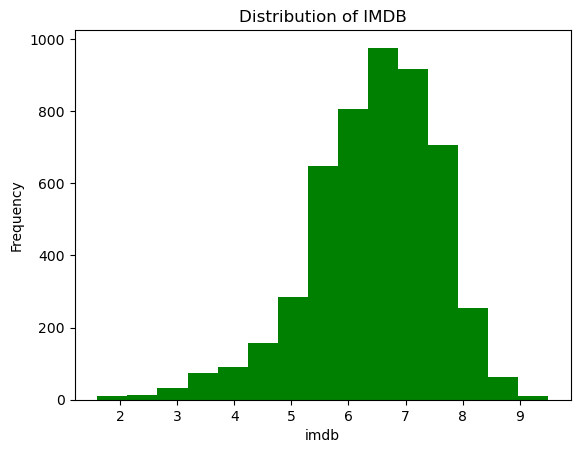

In [18]:
plt.hist(data['imdb_score'], bins=15, color='green')

# Add a title and labels
plt.title('Distribution of IMDB')
plt.xlabel('imdb')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

Let's check how many movies have the `imdb_score` less than `4`.

In [19]:
data.imdb_score<4

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Name: imdb_score, Length: 5043, dtype: bool

In [20]:
low_score_movies = data[data.imdb_score<4]
low_score_movies

,color,director_name,duration,movie_income,star_name,movie_title,Language,Country,movie_budget,title_year,imdb_score
217,Color,Joel Schumacher,125.0,107285004.0,Michael Gough,Batman & Robin,English,USA,125000000.0,1997.0,3.7
267,Color,Jan de Bont,121.0,48068396.0,Jason Patric,Speed 2: Cruise Control,English,USA,160000000.0,1997.0,3.7
273,Color,Bo Welch,82.0,100446895.0,Sean Hayes,The Cat in the Hat,English,USA,109000000.0,2003.0,3.8
313,Color,Pitof,87.0,40198710.0,Frances Conroy,Catwoman,English,USA,100000000.0,2004.0,3.3
319,Color,Lawrence Guterman,94.0,17010646.0,Jamie Kennedy,Son of the Mask,English,USA,84000000.0,2005.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...
4988,Color,Terron R. Parsons,93.0,NaN,Richard Tyson,Hayride,English,USA,60000.0,2012.0,3.4
5000,Color,Travis Legge,83.0,NaN,Elissa Dowling,Raymond Did It,English,USA,40000.0,2011.0,3.2
5002,Color,Collin Joseph Neal,75.0,NaN,Julianne Gabert,"Run, Hide, Die",English,USA,50000.0,2012.0,3.7
5017,Color,Travis Legge,90.0,NaN,Kristen Seavey,Dry Spell,English,USA,22000.0,2013.0,3.3


Exercise: Use a histogram to visualize the distribution of movie IMdb score in that are produced in `USA`.

In [21]:
low_score_movies.shape

(156, 11)

In [22]:
USA_df = data[data['Country'] == 'USA']
USA_df

,color,director_name,duration,movie_income,star_name,movie_title,Language,Country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5
5,Color,Andrew Stanton,132.0,73058679.0,Daryl Sabara,John Carter,English,USA,263700000.0,2012.0,6.6
6,Color,Sam Raimi,156.0,336530303.0,J.K. Simmons,Spider-Man 3,English,USA,258000000.0,2007.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,95.0,4584.0,Kerry BishÃ©,Newlyweds,English,USA,9000.0,2011.0,6.4
5039,Color,NaN,43.0,NaN,Natalie Zea,The Following,English,USA,NaN,NaN,7.5
5040,Color,Benjamin Roberds,76.0,NaN,Eva Boehnke,A Plague So Pleasant,English,USA,1400.0,2013.0,6.3
5041,Color,Daniel Hsia,100.0,10443.0,Alan Ruck,Shanghai Calling,English,USA,NaN,2012.0,6.3


Text(0.5, 1.0, 'USA scrore')

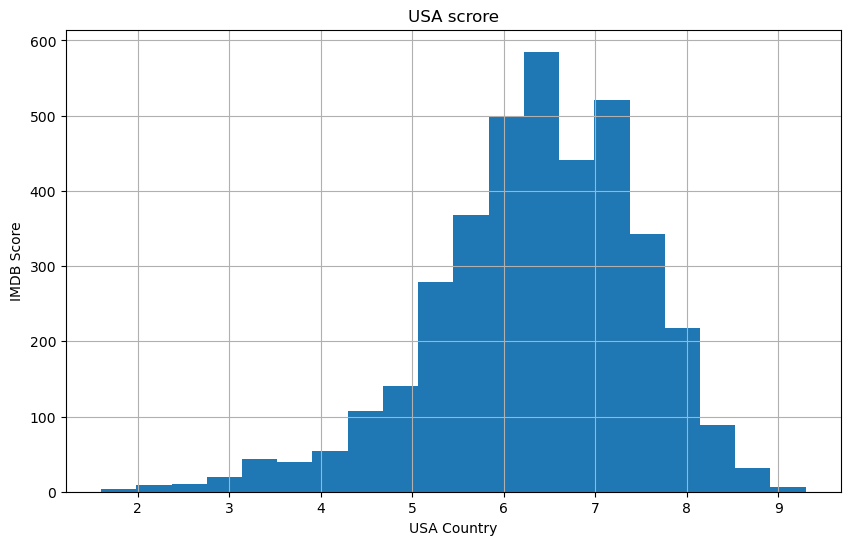

In [23]:
USA_df.imdb_score.hist(bins=20, figsize=(10,6))
plt.xlabel('USA Country')
plt.ylabel('IMDB Score')
plt.title('USA scrore')

In [24]:
data.Country =='USA'

0        True
1        True
2       False
3        True
4       False
        ...  
5038    False
5039     True
5040     True
5041     True
5042     True
Name: Country, Length: 5043, dtype: bool

Text(0.5, 1.0, 'USA Movies')

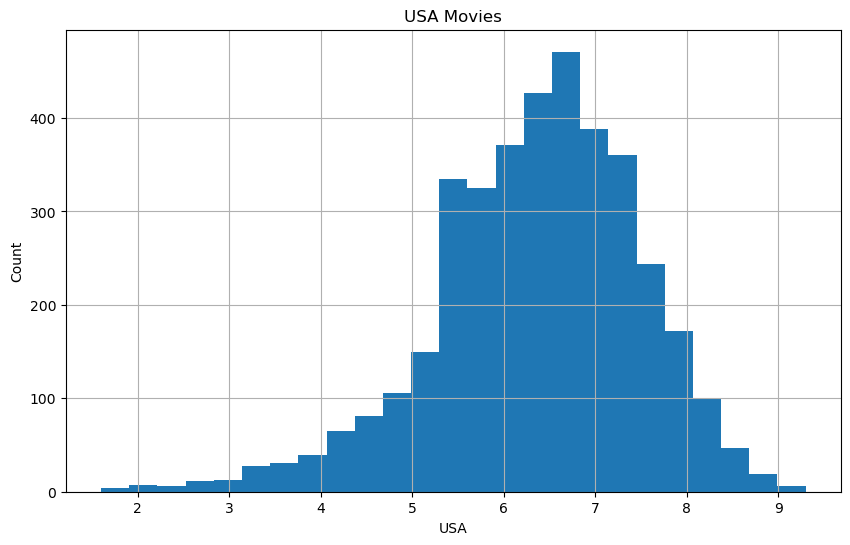

In [25]:
data[data.Country =='USA'].imdb_score.hist(bins=25, figsize=(10,6))
plt.xlabel('USA')
plt.ylabel('Count')
plt.title('USA Movies')

---
### Let's answer to some analytical questions 
    
Question 1 - In which year we have the `highest` and `lowest` number of movies?

Now finding out number of movies per year

In [26]:
count_year = data.groupby('title_year').size()
count_year

title_year
1916.0      1
1920.0      1
1925.0      1
1927.0      1
1929.0      2
         ... 
2012.0    221
2013.0    237
2014.0    252
2015.0    226
2016.0    106
Length: 91, dtype: int64

In [27]:
count_year[2012]

221

In [28]:
count_year.max()

260

In [29]:
count_year.idxmax()

2009.0

In [62]:
count_year.min()

1

In [63]:
count_year.idxmin()

1916.0

In [30]:
year= data.groupby(data['imdb_score']).sum().reset_index()
year

,imdb_score,duration,movie_income,movie_budget,title_year
0,1.6,115.0,73000942.0,13000000.0,2011.0
1,1.7,91.0,0.0,65000000.0,2012.0
2,1.9,273.0,23283976.0,46000000.0,6017.0
3,2.0,203.0,5694308.0,31000000.0,4021.0
4,2.1,289.0,16205206.0,39600000.0,6010.0
...,...,...,...,...,...
73,9.0,425.0,590616061.0,198000000.0,3982.0
74,9.1,200.0,894186.0,17000000.0,2016.0
75,9.2,175.0,134821952.0,6000000.0,1972.0
76,9.3,142.0,28341469.0,25000000.0,1994.0


Let's create a line chart to show the result

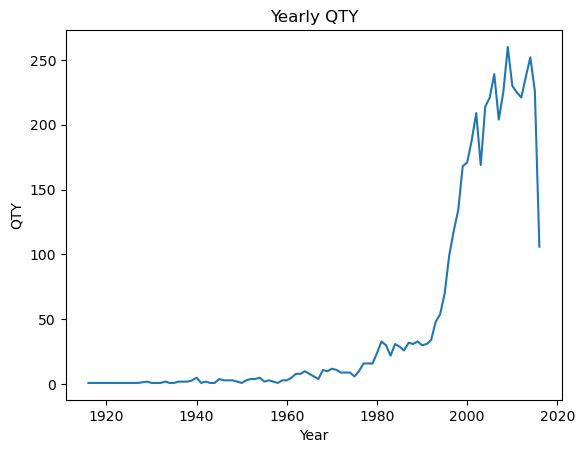

In [31]:
count_year.plot()
plt.xlabel('Year')
plt.ylabel('QTY')
plt.title('Yearly QTY')
plt.show()

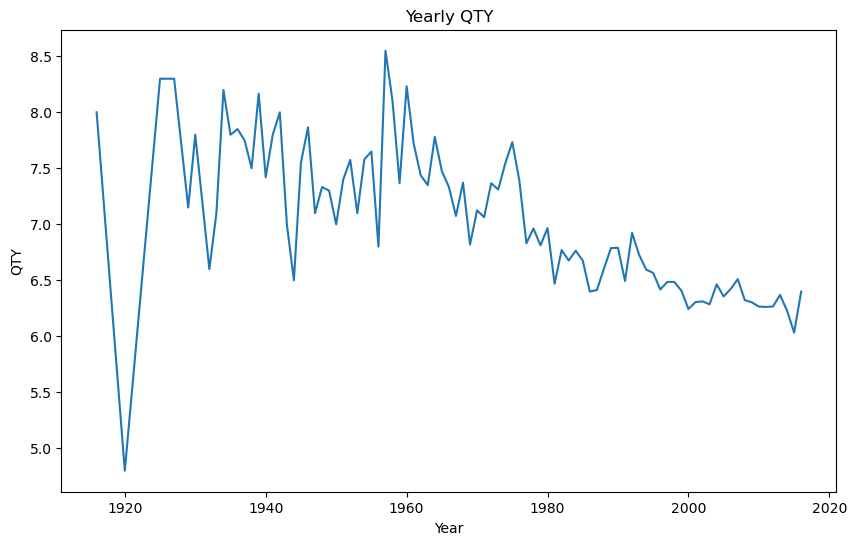

In [34]:
plt.figure(figsize=(10,6))
plt.plot(yearQTY)
plt.xlabel('Year')
plt.ylabel('QTY')
plt.title('Yearly QTY')
plt.show()

Question 2 - In which year we have `minimum` and `maximum` average `imdb_score` ? 

Finding average imdb score per year 

In [33]:
yearQTY= data.groupby(data['title_year'])['imdb_score'].mean()
yearQTY

title_year
1916.0    8.000000
1920.0    4.800000
1925.0    8.300000
1927.0    8.300000
1929.0    7.150000
            ...   
2012.0    6.266516
2013.0    6.369620
2014.0    6.228175
2015.0    6.033628
2016.0    6.399057
Name: imdb_score, Length: 91, dtype: float64

In [35]:
year_Ave=data.groupby('title_year')['imdb_score'].mean() 
year_Ave

title_year
1916.0    8.000000
1920.0    4.800000
1925.0    8.300000
1927.0    8.300000
1929.0    7.150000
            ...   
2012.0    6.266516
2013.0    6.369620
2014.0    6.228175
2015.0    6.033628
2016.0    6.399057
Name: imdb_score, Length: 91, dtype: float64

In [36]:
year1= data.groupby(data['imdb_score']).mean().reset_index()
year1

,imdb_score,duration,movie_income,movie_budget,title_year
0,1.6,115.000000,7.300094e+07,1.300000e+07,2011.000000
1,1.7,91.000000,NaN,6.500000e+07,2012.000000
2,1.9,91.000000,1.164199e+07,1.533333e+07,2005.666667
3,2.0,101.500000,5.694308e+06,1.550000e+07,2010.500000
4,2.1,96.333333,5.401735e+06,1.320000e+07,2003.333333
...,...,...,...,...,...
73,9.0,141.666667,2.953080e+08,9.900000e+07,1991.000000
74,9.1,66.666667,4.470930e+05,1.700000e+07,2016.000000
75,9.2,175.000000,1.348220e+08,6.000000e+06,1972.000000
76,9.3,142.000000,2.834147e+07,2.500000e+07,1994.000000


Let's Use a barchart to visualize the result

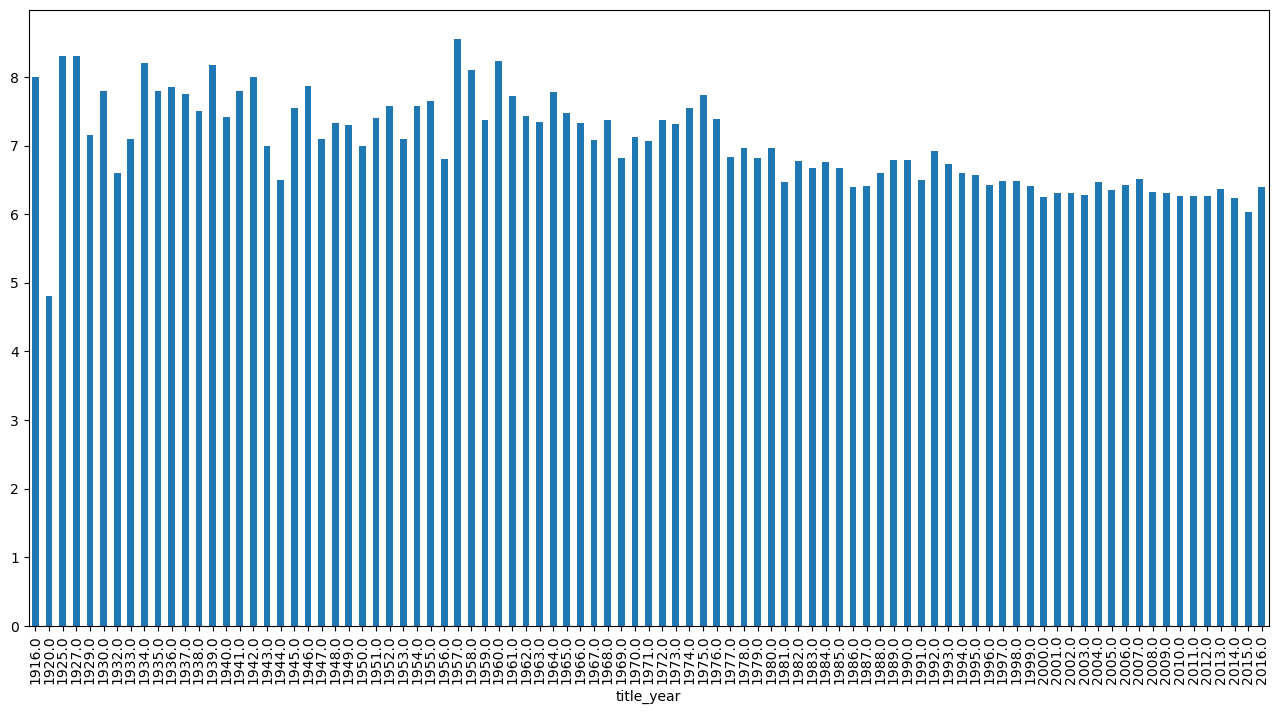

In [37]:
ax=year_Ave.plot.bar(figsize=(16,8))

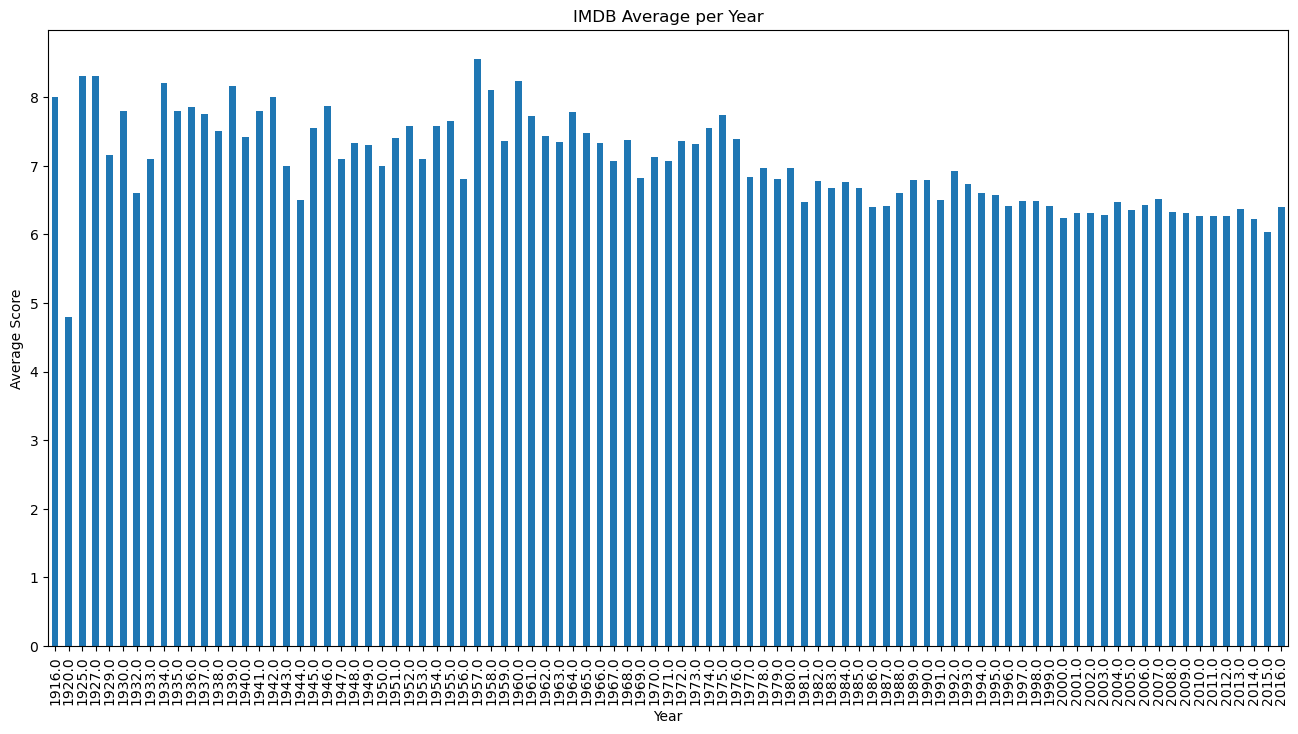

In [72]:
ax=year_Ave.plot.bar(figsize=(16,8))
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('IMDB Average per Year')
plt.show()

Exercise: 
Question 3 - In which year we have the `minimum` and `maximum` spent movie budget?

`hint: use a line chart to visualize your results.` 

In [38]:
Movie_budget = data.groupby('title_year')['movie_budget'].sum()
Movie_budget

title_year
1916.0    3.859070e+05
1920.0    1.000000e+05
1925.0    2.450000e+05
1927.0    6.000000e+06
1929.0    3.790000e+05
              ...     
2012.0    8.146368e+09
2013.0    8.631557e+09
2014.0    8.089608e+09
2015.0    7.889754e+09
2016.0    5.267775e+09
Name: movie_budget, Length: 91, dtype: float64

<AxesSubplot: xlabel='title_year'>

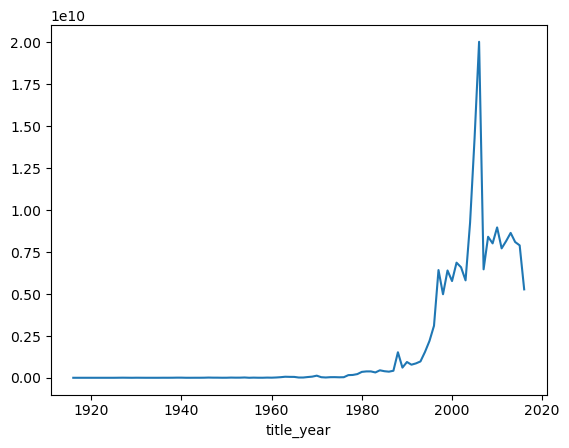

In [39]:
Movie_budget.plot()

In [40]:
Movie_budget.idxmax()

2006.0

In [41]:
Movie_budget.max()

20019582000.0

In [82]:
Movie_budget.idxmin()

1920.0

In [83]:
Movie_budget.min()

100000.0

Question 4 - Is there any relationship between IMdb score of a movie and the movie income?

To approaches to solve this question:
- Visual Correlation Analysis 
- Generating the Correlation Matirx

In [44]:
data2=data[['imdb_score', 'movie_income']]
data2

,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
4,7.1,NaN
...,...,...
5038,7.7,NaN
5039,7.5,NaN
5040,6.3,NaN
5041,6.3,10443.0


In [45]:
data2.isnull().sum()

imdb_score        0
movie_income    884
dtype: int64

Let's drop the rows with `non` values

In [48]:
data2.dropna()

,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
5,6.6,73058679.0
...,...,...
5034,6.3,70071.0
5035,6.9,2040920.0
5037,6.4,4584.0
5041,6.3,10443.0


Let's create a scatter plot to see the data

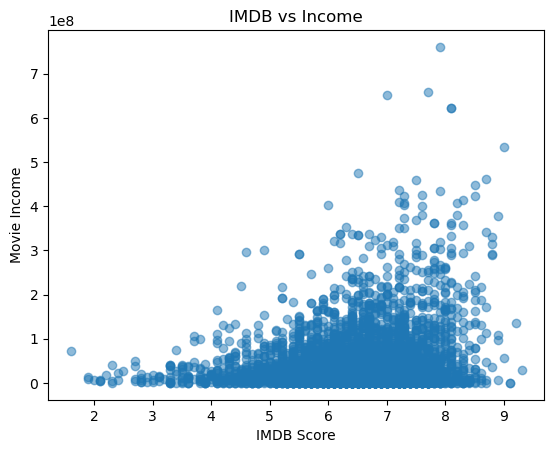

In [53]:
plt.scatter(x='imdb_score', y='movie_income', data=data2, alpha=0.5)
plt.xlabel('IMDB Score')
plt.ylabel('Movie Income')
plt.title('IMDB vs Income')
plt.show()

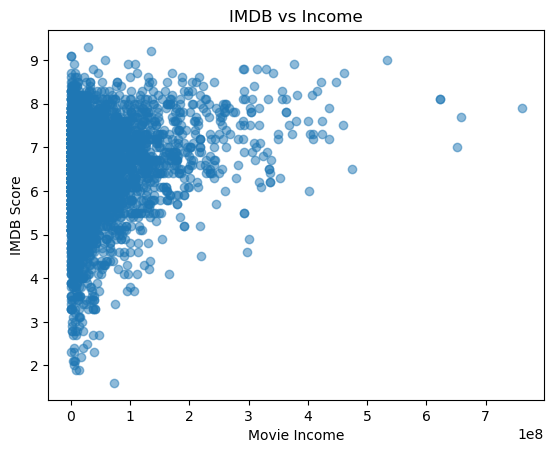

In [54]:
figsize=(16,8)
plt.scatter(x='movie_income',y='imdb_score' , data=data2,  alpha=0.5)
plt.ylabel('IMDB Score')
plt.xlabel('Movie Income')
plt.title('IMDB vs Income')
plt.show()

Let's generate the correlation matrix

In [55]:
data2.corr()

,imdb_score,movie_income
imdb_score,1.000000,0.198021
movie_income,0.198021,1.000000
